## Breast Cancer Imaging

### Background Info 
features are computed from Fine Needle Aspiration imaging (http://www.cs.wisc.edu/~street/images/)
1) ID number
2) Diagnosis (M = malignant, B = benign)
3) 
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

30 total features, as each measurement contains the mean, standard error, and the worst/extreme values (mean of the 3 extremities)

### Data Preprocessing

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('breastcancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print(df['diagnosis'].unique())

['M' 'B']


In [7]:
df = df.drop(columns = ['id', 'Unnamed: 32']) #don't reall need these columns
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<bound method NDFrame.describe of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.2

### Exploratory Data Analysis

Text(0, 0.5, 'Count')

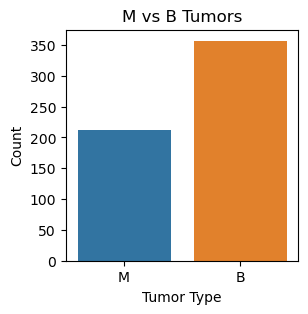

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(x= 'diagnosis', data=df)
plt.title('M vs B Tumors')
plt.xlabel('Tumor Type')
plt.ylabel('Count')


This shows the relative balance in classifications for this dataset, which will be important later on when selecting on optimal classifcation model. The majority class here is the "benign" group (~70%), while the "malignant group" is the minority (~30%).

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


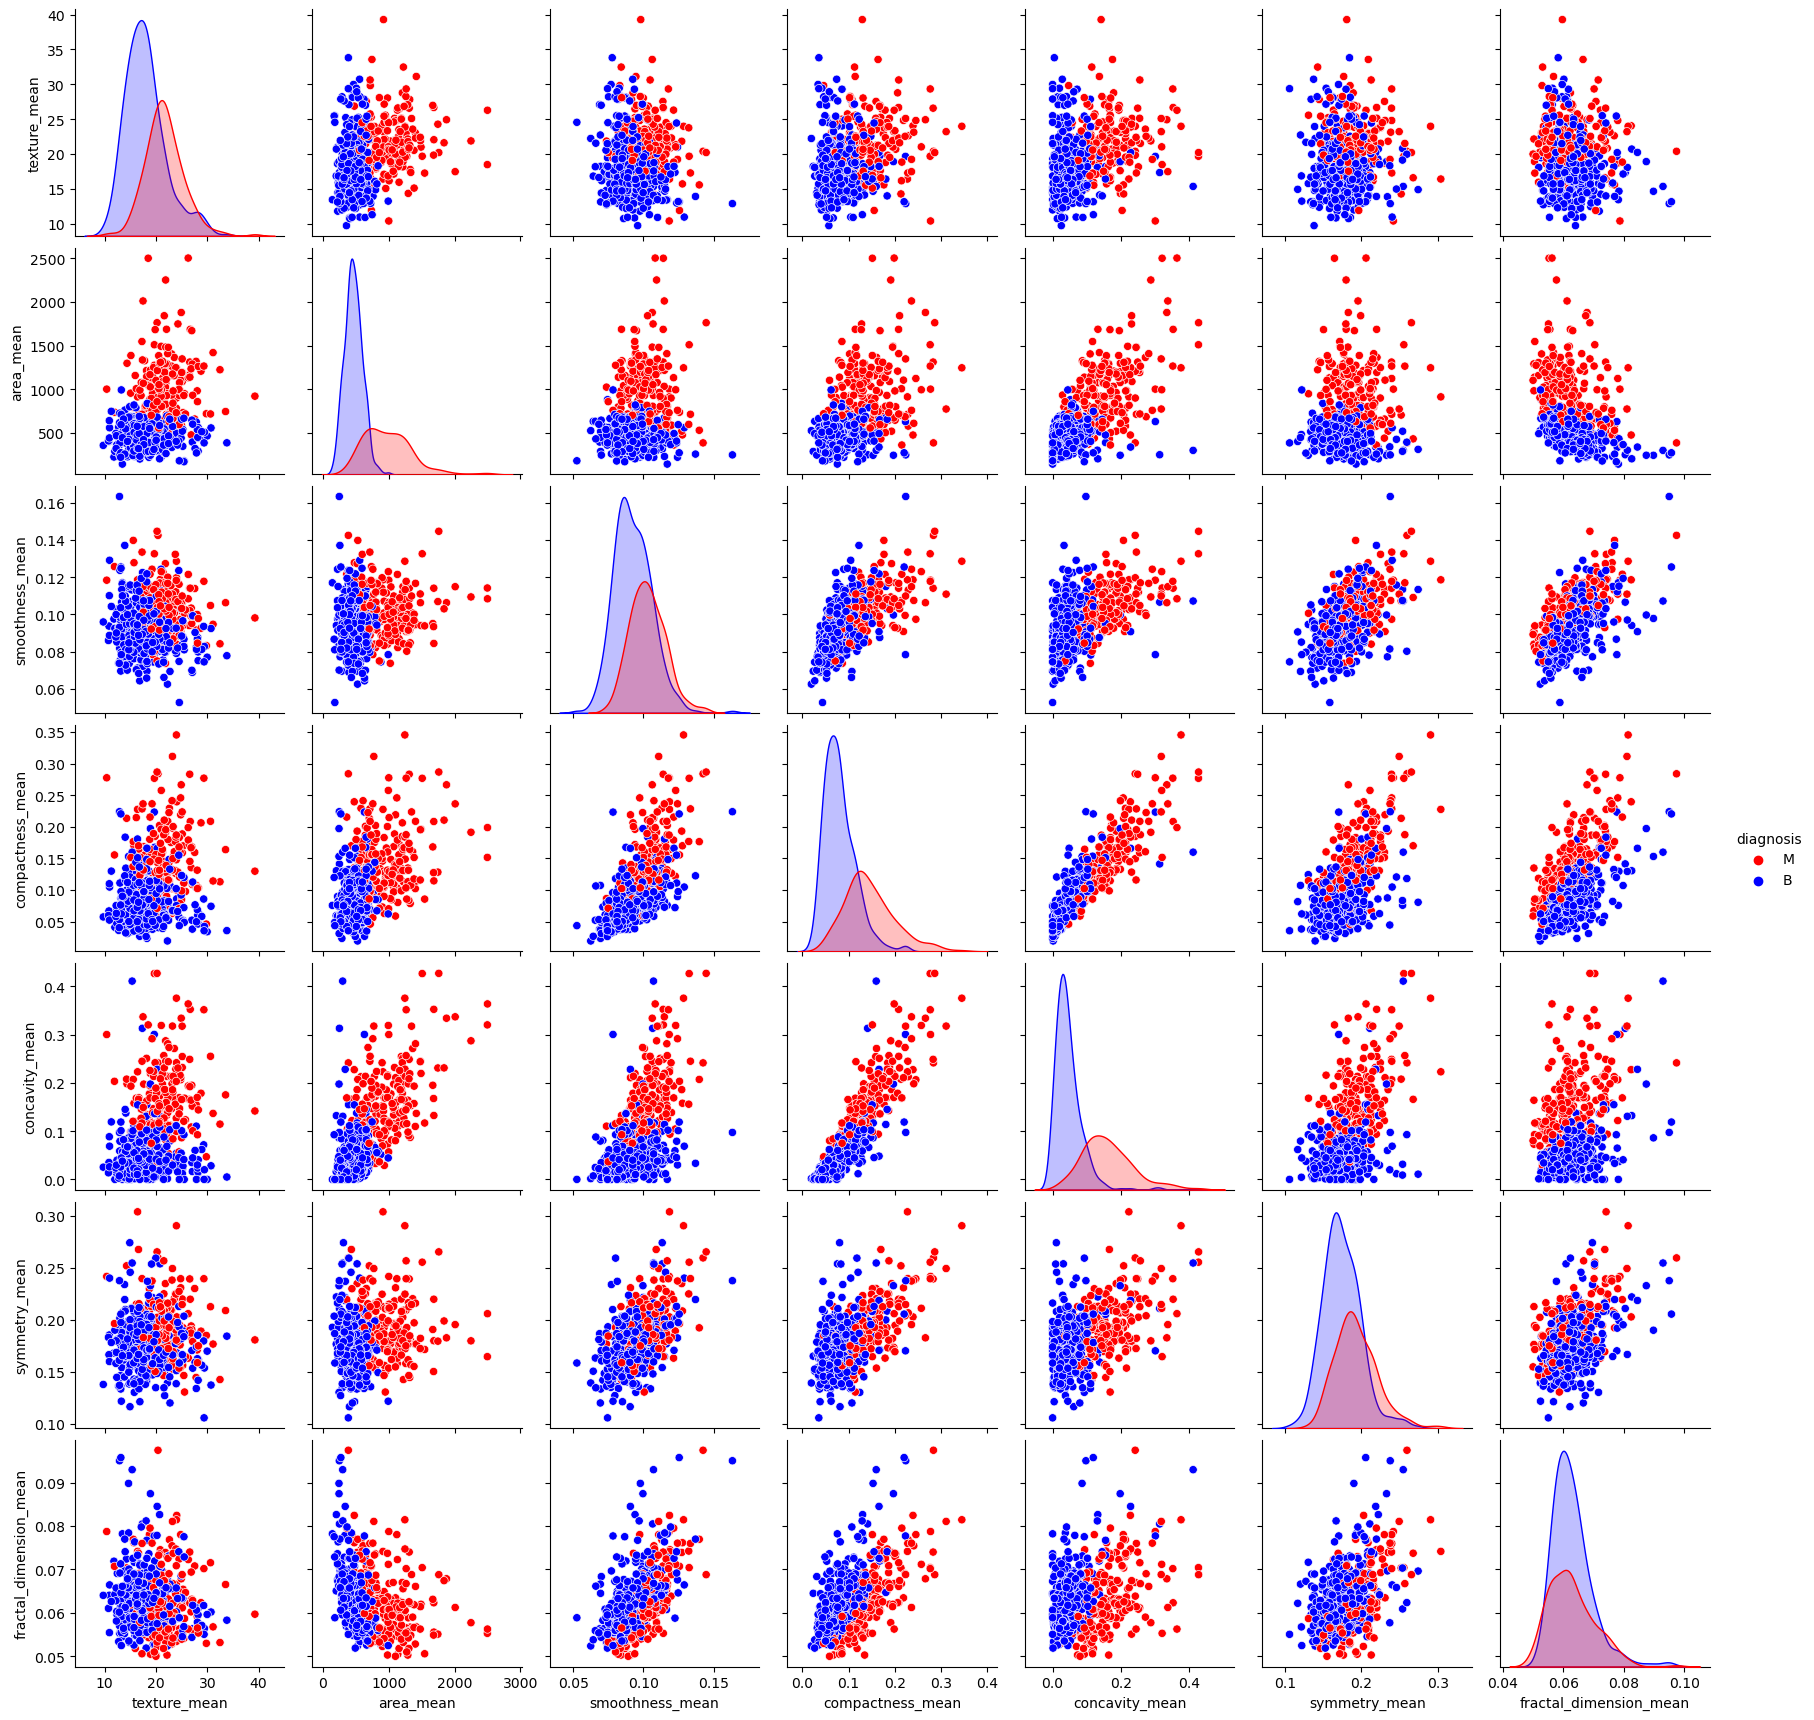

In [10]:
#do a pairplot to plot all features in matrix to see if there are any scatter plots worth investigating later
#NOTE: going to remove perimeter and radius since they will probably correlate highly with area
sns.pairplot(df, hue='diagnosis', 
             vars=['texture_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean'], 
             palette={'M': 'red', 'B': 'blue'})

# Display the plot
plt.show()

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0}) #numerically map categorization for whether tumor is benign or malignant
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
dfM = df[df['diagnosis'] == 1] #create 2 dfs that are split based on which is malignant and which is benign
dfB = df[df['diagnosis'] == 0]
dfM.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


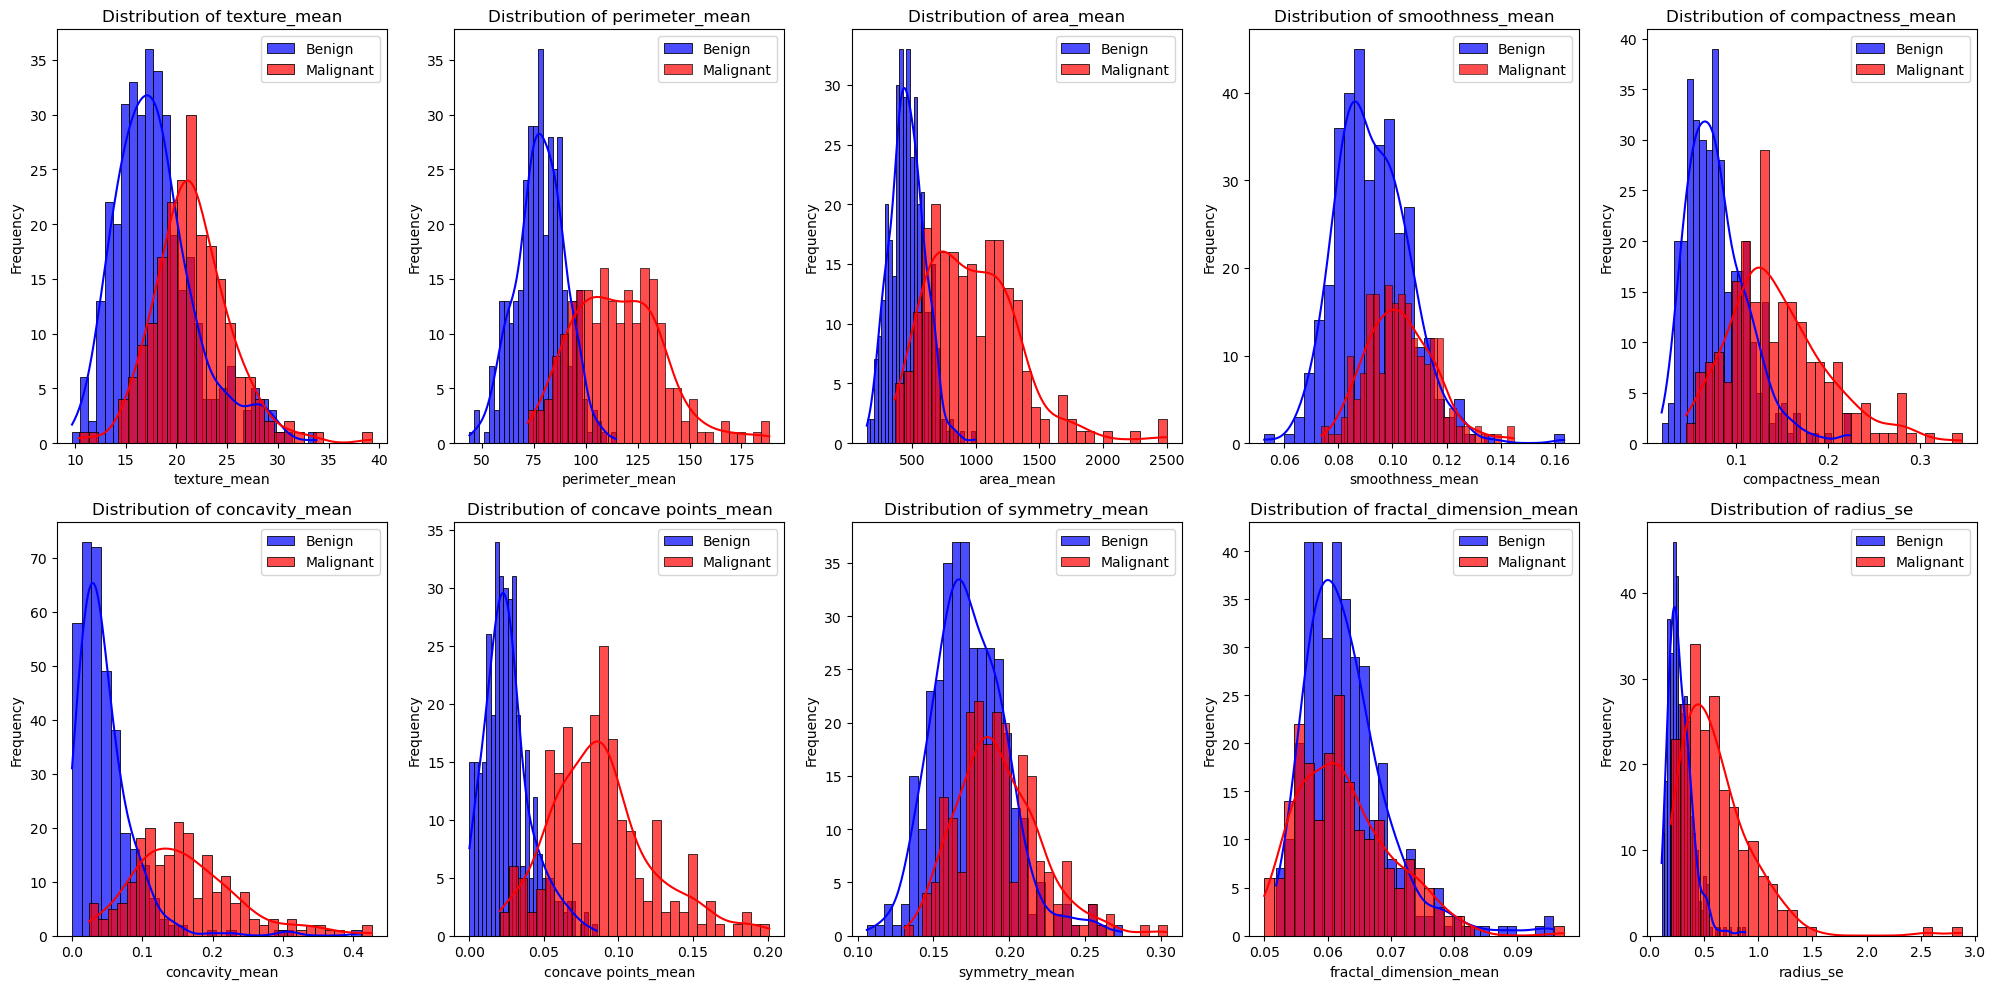

In [13]:
#create a plot that contains both malignant and benign df values SEPARATELY for each of the 10 relevant characteristics
mean_features = df.columns[2:12]
se_features = df.columns[12:21]
worst_features = df.columns[20:31]

rows, cols = 2, 5  # Arrange plots in a 2x5 grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(mean_features):
    sns.histplot(dfB[feature], kde=True, ax=axes[i], bins=30, color="blue", label="Benign", alpha=0.7)
    sns.histplot(dfM[feature], kde=True, ax=axes[i], bins=30, color="red", label="Malignant", alpha=0.7)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()
    
plt.tight_layout()
plt.show()

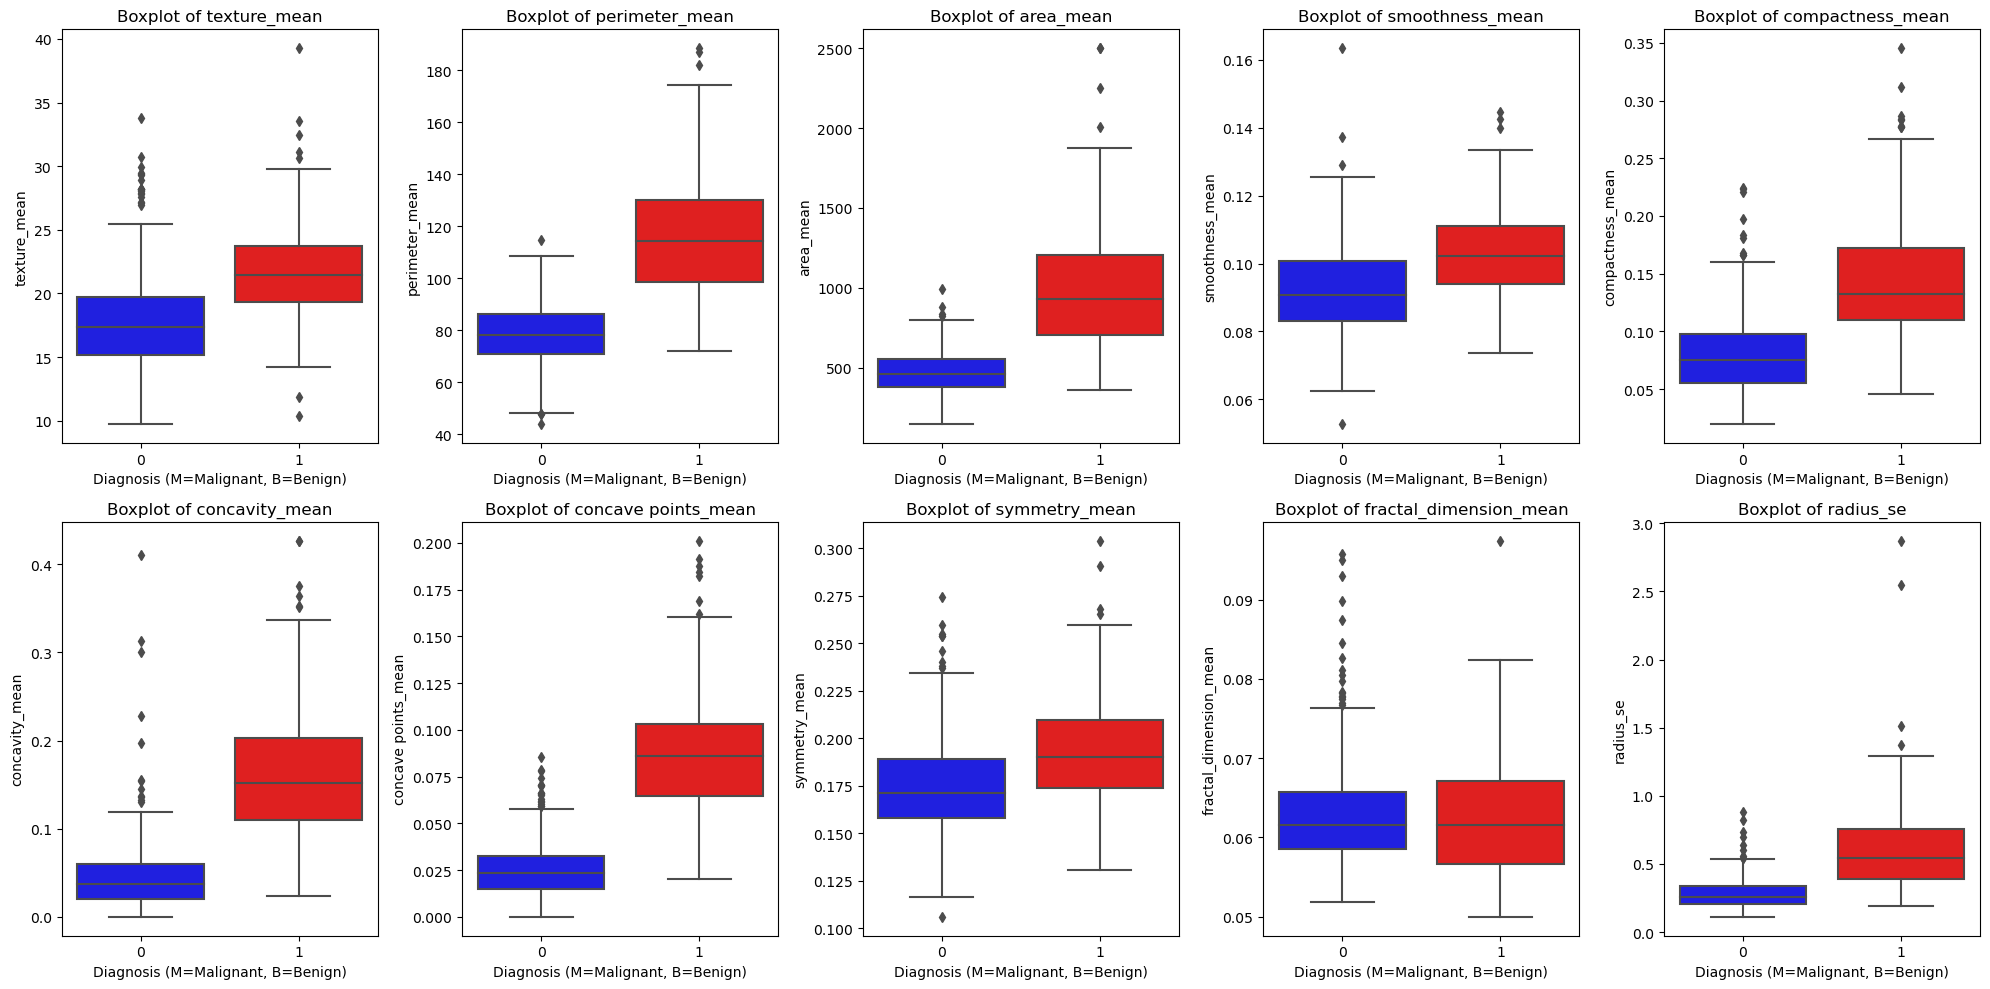

In [14]:
rows, cols = 2, 5 
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(mean_features):
    sns.boxplot(
        x='diagnosis', 
        y=feature, 
        data=df, 
        ax=axes[i], 
        palette={1: 'red', 0: 'blue'}
    )
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("Diagnosis (M=Malignant, B=Benign)")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


does this visualization account for what we would expect logically for malignant vs benign cells? 

- malignant cells will tend to be larger overall and therefore a higher magnitude in associated geometric measurements
- e.g. cell radius should be expected to be vastly different (which it is)
- malignant tumors should stain darker due to higher DNA content which can result in texture feature being different

which features tend to show the **least** correlation initially? Symmetry, smoothness, fractal dimension (distributions are contained)

Text(0.5, 1.0, 'Heatmap for Mean Features ')

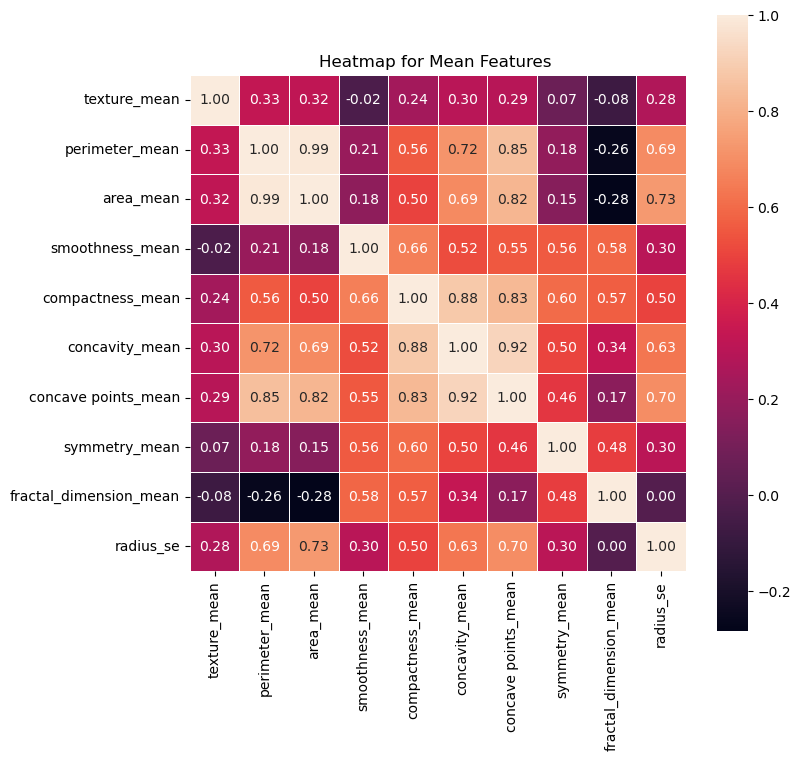

In [16]:

df_means = df[mean_features]
correlation_matrix = df_means.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="rocket", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)
plt.title("Heatmap for Mean Features ")

obviously a lot of visuals here, but some useful information into which features may be redundant to keep in this data set. based on both heatmaps, it seems the obvious features that correlate very closely are:

- radius, perimeter, area (makes sense because math)

### Principle Component Analysis

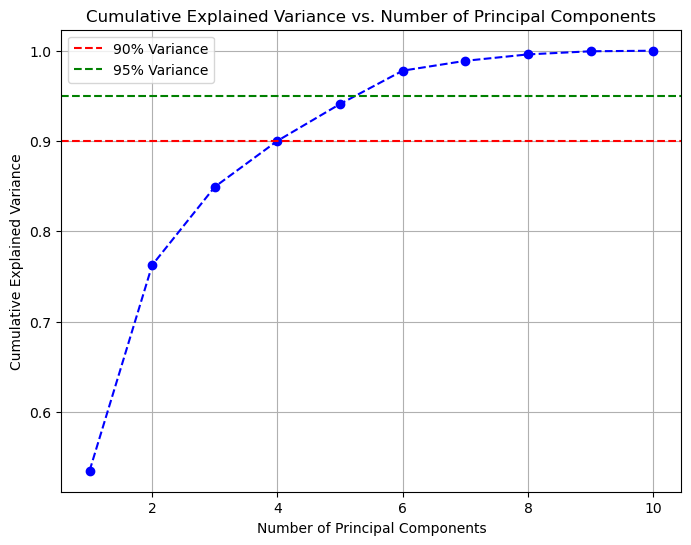

In [19]:
#first step: perform PCA on df_means to see how many dimensions can be reduced here. 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_means)
pca = PCA()
pca.fit(X_scaled)

# calculate cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
components = range(1, len(cumulative_variance) + 1)

# Plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(components, cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

PCA performs a sort of linear transformation on features to reach max orthagonality (so we can select the minimal amount of features while preserving the maximal amount of variance). In this case, we see that just **6 components** is probably enough to explain around **97%** of the total variance. This is as expected as some of the geometric features (radius, area, etc are highly correlated).

In [21]:
#store a version of the PCA transformed matrix 
pca_6 = PCA(n_components=6)
X_pca = pca_6.fit_transform(X_scaled)

pca_columns = [f'PC{i+1}' for i in range(6)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

pca_df['diagnosis'] = df['diagnosis']
df_means['diagnosis'] = df['diagnosis']
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6  diagnosis
0  5.879303  2.638404 -2.224735  0.058200  0.338446  1.675037          1
1  1.094083 -2.269215 -0.999690  0.412873 -0.449320  0.220832          1
2  3.803416 -0.746865 -0.359962  0.312825 -0.233226 -0.406884          1
3  4.444304  6.337673  0.947403 -0.547645  0.249540  0.338288          1
4  2.874131 -1.380768 -1.906903 -0.213870 -0.093987  0.285378          1


C:\Users\yuvra\AppData\Local\Temp\ipykernel_24148\3158655144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_means['diagnosis'] = df['diagnosis']


### Machine Learning Classification
Now that the exploratory analysis is complete and some PCA has been done for dimensionality reduction (which we may visit later), the fun part begins - building/training classification models using different ML algorithms to classify tumors as either malignant or benign. 

In [23]:
# first step as always: preprocessing the data to be accepted into these algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#X_scaled exists from previous code
y = df_means['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC
    
    # Compute metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }


results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.929825   0.886364  0.928571  0.906977  0.984127
Random Forest        0.929825   0.947368  0.857143  0.900000  0.984954
SVM                  0.956140   0.974359  0.904762  0.938272  0.983135
KNN                  0.964912   0.952381  0.952381  0.952381  0.981316
XGBoost              0.956140   0.930233  0.952381  0.941176  0.975529


D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


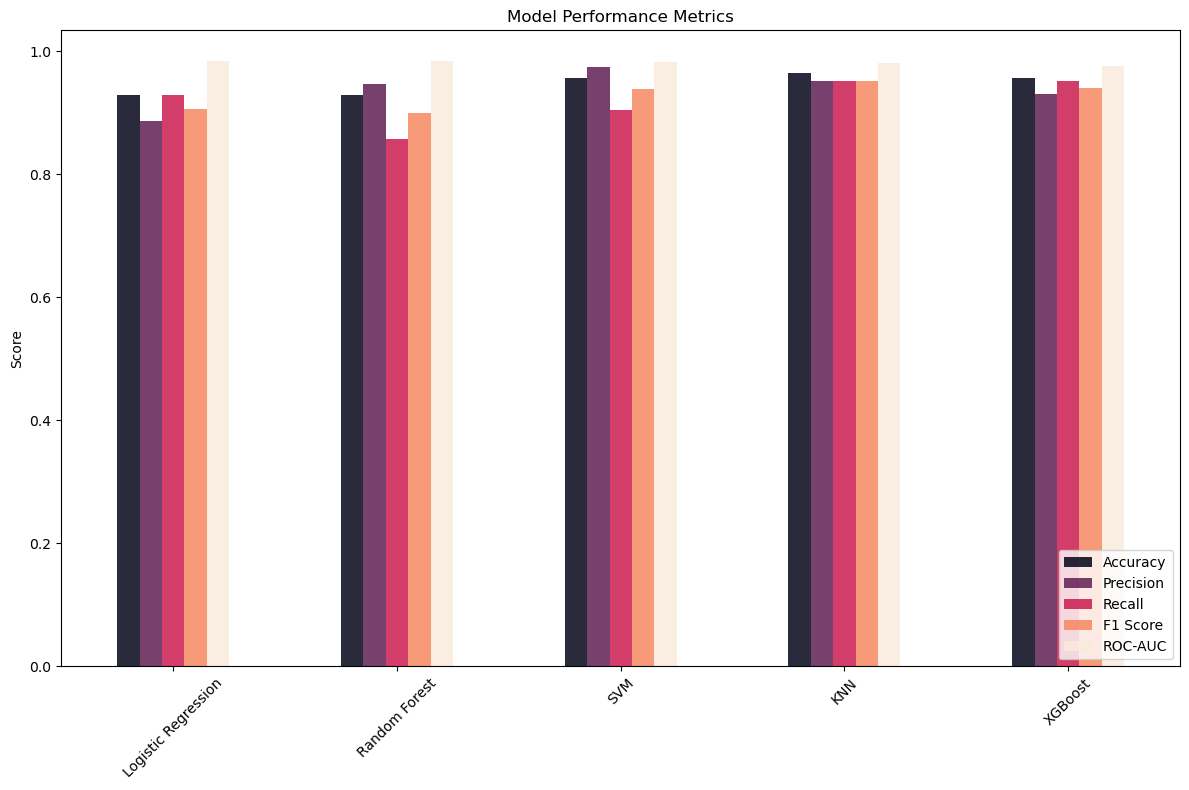

In [121]:
import matplotlib.pyplot as plt

# Bar plot for comparison
results_df.plot(kind='bar', figsize=(12, 8), colormap='rocket', alpha=0.85)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

These numbers and scores obviously mean a lot, and there are a lot of technicalities involved, but here is a quick summary of what each of these 4 different scores mean and their relevance:

- **Accuracy**: The percentage of correct predictions (both true positives and true negatives) out of the total predictions. Good for balanced sets.
- **Precision**: The percentage of positive predictions that are actually correct; false positives are costly (i.e. incorrectly diagnosing benign as malignant)
- **Recall**: The percentage of actual positives that the model correctly identifies; false negatives are costly (i.e. missing a malignant tumor as being benign)
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two. Good for getting a tradeoff in imbalanced sets.
- **ROC-AUC**: Measures the ability of the model to distinguish between classes across all thresholds. 0.95 would mean this has excellent performance.

In this case, priority should be given to precision and recall, since the set is imbalanced and false negatives would be very costly in the context of tumor detection. Overall, as seen with the graph comparing model scores, it seems **KNN** is the most robust classification model to use for this set. We can now investigate tuning the model a bit better to see if we can squeeze out better performance:

### Model Tuning 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Train KNN without hyperparameter tuning (default parameters)
knn_default = KNeighborsClassifier()  # Default parameters (n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# F1 score before tuning
f1_default = f1_score(y_test, y_pred_default)
print(f"KNN F1 score before tuning: {f1_default}")

# 2. Hyperparameter tuning with GridSearchCV (using F1 score as the scoring metric)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'leaf_size': [20, 30, 40],
}

grid_search = GridSearchCV(estimator=knn_default, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model after tuning
best_knn = grid_search.best_estimator_

# 3. Evaluate the tuned KNN model
y_pred_tuned = best_knn.predict(X_test)

# F1 score after tuning
f1_tuned = f1_score(y_test, y_pred_tuned)
print(f"KNN F1 score after tuning: {f1_tuned}")

print("Best Hyperparameters:", grid_search.best_params_)


KNN F1 score before tuning: 0.9647058823529412
Fitting 5 folds for each of 108 candidates, totalling 540 fits
KNN F1 score after tuning: 0.9534883720930233
Best Hyperparameters: {'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Based on using GridSearchCV for hyperparamater tuning, it seems the actual performance goes down, which could be indicative of some degree of overfitting on the model. We can progress with some manual tuning:

In [81]:
# Example of testing different values of n_neighbors
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    print(f"F1 Score for n_neighbors={k}: {f1_score(y_test, y_pred)}")


F1 Score for n_neighbors=1: 0.9411764705882352
F1 Score for n_neighbors=2: 0.951219512195122
F1 Score for n_neighbors=3: 0.9302325581395349
F1 Score for n_neighbors=4: 0.9397590361445783
F1 Score for n_neighbors=5: 0.9647058823529412
F1 Score for n_neighbors=6: 0.9761904761904763
F1 Score for n_neighbors=7: 0.9761904761904763
F1 Score for n_neighbors=8: 0.963855421686747
F1 Score for n_neighbors=9: 0.963855421686747
F1 Score for n_neighbors=10: 0.951219512195122
F1 Score for n_neighbors=11: 0.9523809523809524
F1 Score for n_neighbors=12: 0.9397590361445783
F1 Score for n_neighbors=13: 0.9397590361445783
F1 Score for n_neighbors=14: 0.9397590361445783
F1 Score for n_neighbors=15: 0.9397590361445783


Okay, seems like n_neighbors = 7 is a solid choice!

In [96]:
# Example of testing different values of leaf_size
for leaf_size in [20, 30, 40]:
    knn = KNeighborsClassifier(n_neighbors=7, leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"F1 Score for leaf_size={leaf_size}: {f1_score(y_test, y_pred)}")


F1 Score for leaf_size=20: 0.9761904761904763
F1 Score for leaf_size=30: 0.9761904761904763
F1 Score for leaf_size=40: 0.9761904761904763


Leaf size doesn't seem to do much, but it seems we have arrived at our final, most tuned model:

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

knn_final = KNeighborsClassifier(n_neighbors = 7)  
knn_final.fit(X_train, y_train)
# Get the predicted values
y_pred = knn_final.predict(X_test)

f1_final = f1_score(y_test, y_pred)
print(f"Final KNN Model F1 Score: {f1_final}")
accu_final = accuracy_score(y_test, y_pred)
print(f"Final KNN Model Accuracy: {accu_final}")


Final KNN Model F1 Score: 0.9761904761904763
Final KNN Model Accuracy: 0.9824561403508771
